In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [8]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)


## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [12]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price. (y = -0.1725x + 24764.56)
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) 0.02 - terrible fit

In [4]:
mileage = df[["Mileage"]]
price = df["Price"]

regr = linear_model.LinearRegression()

In [10]:
regr.fit(mileage, price)
print('Coefficients: \n', regr.coef_)
print('Variance Score: %.2f' % regr.score(mileage, price))
print('Y-intercept: \n', regr.intercept_)

Coefficients: 
 [-0.1725205]
Variance Score: 0.02
Y-intercept: 
 24764.5590061


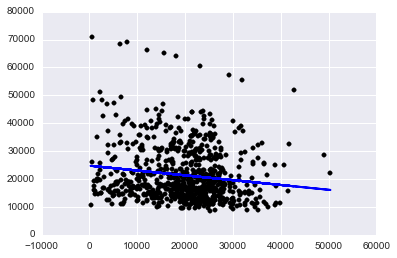

In [9]:
plt.scatter(mileage, price,  color='black')
plt.plot(mileage, regr.predict(mileage), color='blue', linewidth=2)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) 0.446 - not a good fit
3. Find the combination of the factors that is the best predictor for price.

In [13]:
import itertools

In [37]:
indicators1 = df[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
dependent_vars = list(indicators1.columns)
dependent_vars.remove('Price')
combos = list(itertools.combinations(dependent_vars, 7))

In [35]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df = indicators.loc[:, combo + ['Price']]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)
coefs = tuple(regr.coef_)
coefs_list = list(zip(best[0], coefs))
coefs_list

(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.4462643536728379)
[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03] 6758.7551436


[('Mileage', -0.16974783233303678),
 ('Cylinder', 3792.3789307825145),
 ('Liter', -787.22073163382584),
 ('Doors', -1542.7458463820647),
 ('Cruise', 6288.9971498499244),
 ('Sound', -1993.7952756984287),
 ('Leather', 3349.3616196135545)]

The coefs list above is the a in the y = ax + b for each column (the coefficient or slope for each column on price). The b is the y-intercept of 6758.76.

In [39]:
def make_combos(indicators, column, combo_num):
    dependent_vars = list(indicators.columns)
    dependent_vars.remove(column)
    combos = list(itertools.combinations(dependent_vars, combo_num))
    return combos

def combo_regression(combo_list):
    choices = []
    for combo in combo_list:
        regr, score = regression_for(combo)
        choices.append((combo, score))
    best = sorted(choices, key=lambda x: x[1])[-1]
    return best

best_of_combos = []
for x in range(1, 8):
    combos = make_combos(indicators, "Price", x)
    best = combo_regression(combos)
    best_of_combos.append(best)
    

    

In [40]:
best_of_combos

[(('Cylinder',), 0.32385903759512258),
 (('Cylinder', 'Cruise'), 0.38394913240273443),
 (('Cylinder', 'Cruise', 'Leather'), 0.40380272693971553),
 (('Mileage', 'Cylinder', 'Cruise', 'Leather'), 0.42250742147747633),
 (('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'), 0.4369402151237245),
 (('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'),
  0.44569092105870245),
 (('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'),
  0.4462643536728379)]

All 7 of the columns is the best indicator, but still not good.